In [6]:
from commonfunctions import *
import numpy as np
from skimage.morphology import binary_opening, binary_dilation, binary_erosion, skeletonize
from skimage.draw import rectangle
import cv2
import scipy


In [21]:
images = scipy.io.loadmat('./images/hands2017_center_test.mat')
print(images.ke)


dict_keys(['__header__', '__version__', '__globals__', 'centre_pixel'])


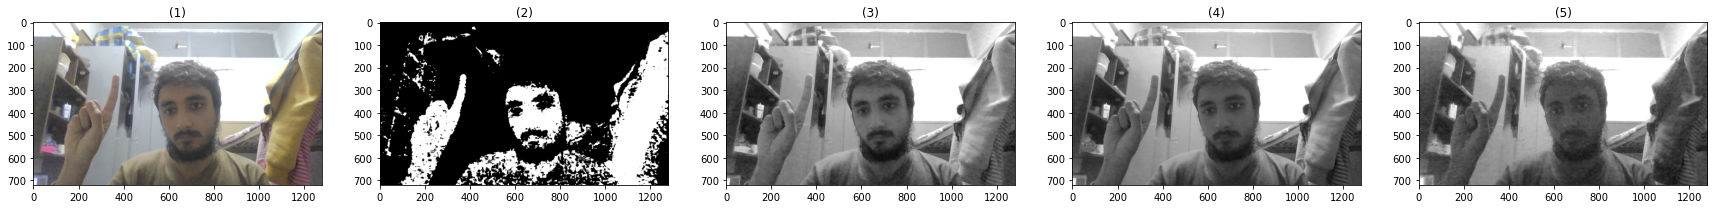

In [24]:
img = io.imread('./images/image8.jpeg')
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
Y = 0.299 * R + 0.587 * G + 0.114 * B
Cb = (B - Y) * 0.564 + 128
Cr = (R - Y) * 0.713 + 128
outImg = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        outImg[i][j] = Cb[i][j] >= 77 and Cb[i][j] <= 127 and Cr[i][j] >= 133 and Cb[i][j] <= 180
show_images([img, outImg, R, G, B])


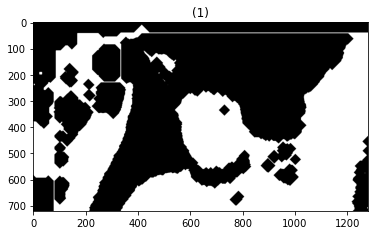

In [27]:
se = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
img1 = np.copy(outImg)
for i in range(20):
    outImg = binary_dilation(outImg, se)
for i in range(20):
    outImg = binary_erosion(outImg, se)
show_images([outImg])


[[0, 1279, 9, 406], [213, 1224, 42, 719], [225, 333, 81, 226], [422, 546, 108, 191], [101, 174, 155, 249], [123, 124, 186, 187], [124, 125, 187, 188], [125, 126, 188, 189], [23, 34, 189, 199], [126, 127, 189, 190], [127, 128, 190, 191], [479, 483, 191, 196], [483, 484, 191, 192], [190, 238, 215, 302], [495, 496, 216, 217], [496, 497, 217, 218], [497, 498, 218, 219], [498, 499, 219, 220], [499, 500, 220, 221], [500, 504, 221, 225], [223, 355, 229, 369], [0, 6, 234, 240], [514, 515, 238, 239], [77, 231, 260, 558], [1035, 1036, 274, 275], [709, 751, 313, 356], [1216, 1279, 433, 719], [895, 1005, 454, 538], [980, 1023, 501, 543], [869, 925, 517, 573], [918, 1014, 538, 623], [1266, 1269, 573, 575], [0, 78, 581, 719], [81, 139, 584, 695], [750, 806, 642, 698], [1276, 1279, 704, 710]]


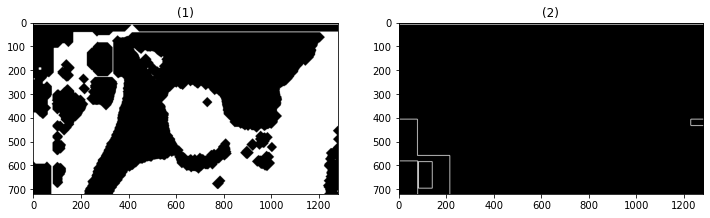

In [28]:
contours = find_contours(outImg)
bounding_boxes = []
for contour in contours:
    Xmin = int(np.min(contour[:, 1]))
    Xmax = int(np.max(contour[:, 1]))
    Ymin = int(np.min(contour[:, 0]))
    Ymax = int(np.max(contour[:, 0]))
    bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])
img_with_boxes = np.zeros(outImg.shape, dtype=float)


print(bounding_boxes)
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = np.array(box, dtype=int)
    # if (Xmax-Xmin)/(Ymax-Ymin) >= 3.0 and (Xmax-Xmin)/(Ymax-Ymin) <= 3.24:
    rr, cc = rectangle(start=(Ymin, Xmin), end=(
        Ymax, Xmax), shape=outImg.shape)
    img_with_boxes[rr, cc] = 1  # set color whitefor box in bounding_boxes:
newImg = img_with_boxes - binary_erosion(img_with_boxes, se)
newImg = binary_dilation(newImg, se)
outImg = outImg + newImg
# img_with_boxes = img_with_boxes * outImg
show_images([outImg, newImg])
